In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [207]:
###Define Inputs
#!!input document must be delineated with two collumns of (x,y) points!!
fouriersignal = np.loadtxt("input.txt",float)
hires = 16 #high resolution at low frequencies, set to at least 2;
          #gives a factor of #hires finer frequency sampling, but with a factor of #hires smaller frequency window

time = fouriersignal[:,0]
signal = fouriersignal[:,1]
T = time[-1] - time[0] #total integration period
N = len(time) #number of points
FFTs = np.zeros([N,2]) #Fourier amplitudes and frequencies
FFTshr = np.zeros([N,2]) #high res


for f in range(1,N):
    A = 0
    Ahr = 0
    for d in range(N):
        A += signal[d] * np.exp(-1j*2*np.pi*d*f/N) #integrate at frequencies f/N
        Ahr += signal[d] * np.exp(-1j*2*np.pi*d*f/N/hires)
    FFTs[f,0] = f/T #frequency
    FFTs[f,1] = la.norm(A) #amplitude
    FFTshr[f,0] = f/T/hires #hires frequency
    FFTshr[f,1] = la.norm(Ahr) #hires amplitude

#Inverse Fourier transform
invFT = np.zeros(N,complex)

for d in range(N):
    for f in range(N):
        invFT[d] += FFTs[f,1] * np.exp(2j*np.pi*d/N*f)
invFT /= N

invFT[0] = np.mean(invFT) #"fix" the first point
#flip parity if it looks like that matches better, take real part and add the DC offset back
if np.mean(abs(signal - np.real(invFT))) < np.mean(abs(signal + np.real(invFT))):
    ReinvFT = np.real(invFT) + np.mean(signal - np.real(invFT))
else: ReinvFT = -np.real(invFT) + np.mean(signal + np.real(invFT))

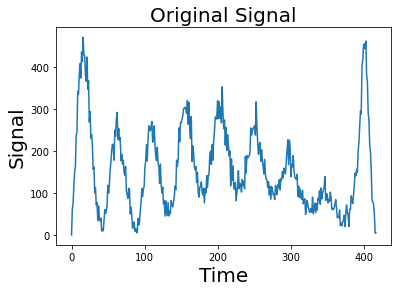

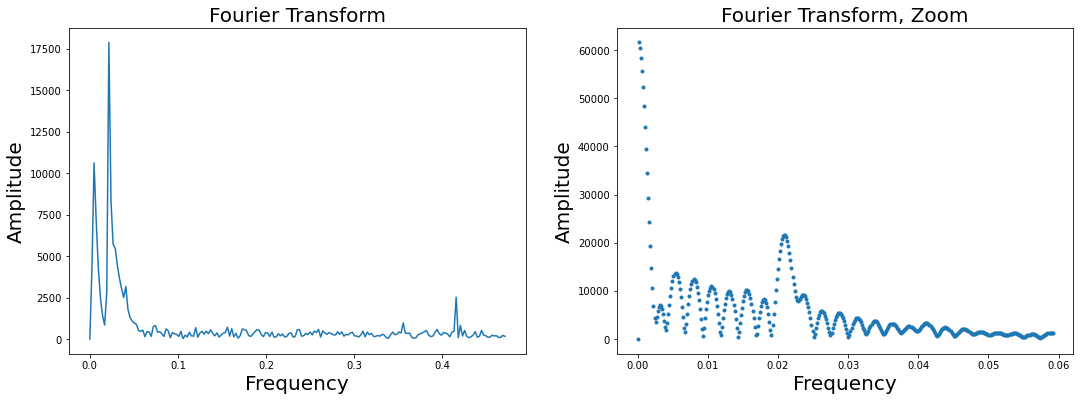

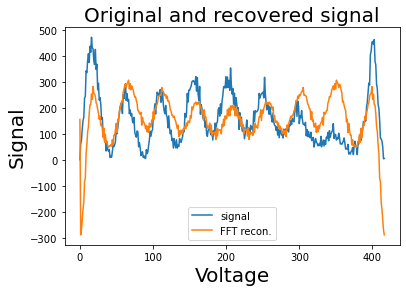

In [211]:
#make plots
plt.plot(time,signal)
plt.title("Original Signal", size=20)
plt.xlabel("Time", size=20)
plt.ylabel("Signal", size=20)
plt.show()

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(FFTs[0:N//2,0],FFTs[0:N//2,1],"-")
ax[0].set_title("Fourier Transform", size=20)
ax[0].set_xlabel("Frequency", size=20)
ax[0].set_ylabel("Amplitude", size=20)

ax[1].plot(FFTshr[:,0],FFTshr[:,1],".")
ax[1].set_title("Fourier Transform, Zoom", size=20)
ax[1].set_xlabel("Frequency", size=20)
ax[1].set_ylabel("Amplitude", size=20)
plt.show()

plt.plot(time,signal,label="signal")
plt.plot(time,ReinvFT,label="FFT recon.")
plt.legend()
plt.title("Original and recovered signal", size=20)
plt.xlabel("Voltage", size=20)
plt.ylabel("Signal", size=20)
plt.show()

## The DFT is always symmetric about its midpoint. Above the midpoint is below the Nyquist criterion and does not represent real frequencies.

## There are two main, expected effects present: The highest frequency components have been removed, smoothing out the sharp peaks, and the DC offset has beed removed. The missing DC offset is close to the mean error value.

## The simplest modification to make is a lowpass or highpass filter. As the lowpass cutoff decreases, the graph becomes more smooth, but with a similar amplitude. Conversely, the highpass filter preserves many of the detailed features, but drastically reduces the RMS.

In [210]:
FFTs[0:15]

array([[0.00000000e+00, 0.00000000e+00],
       [2.40293928e-03, 4.28561327e+03],
       [4.80587855e-03, 1.06199695e+04],
       [7.20881783e-03, 7.16588135e+03],
       [9.61175710e-03, 4.29650973e+03],
       [1.20146964e-02, 2.50158984e+03],
       [1.44176357e-02, 1.42255773e+03],
       [1.68205749e-02, 8.39914596e+02],
       [1.92235142e-02, 2.83840086e+03],
       [2.16264535e-02, 1.78836708e+04],
       [2.40293928e-02, 8.32383219e+03],
       [2.64323320e-02, 5.70079202e+03],
       [2.88352713e-02, 5.46709082e+03],
       [3.12382106e-02, 4.43758173e+03],
       [3.36411499e-02, 3.65024953e+03]])